# Convolutional Neural Networks
As [CNNs](https://en.wikipedia.org/wiki/Convolutional_neural_network) consistem de camadas que extraem informações, geralmente de imagens. Cada camada tem a capacidade de obter uma característica apresentada e de propagar essa característica para camadas posteriores.

1. [Convoluções em Python](#Convoluções-em-Python-(numpy-e-sklearn))
2. [Convoluções com Tensorflow](#Convoluções-com-Tensorflow)
3. [Convoluções em imagens](#Convolução-em-imagens)
4. [Redes convolucionais com Tensorflow](#Redes-convolucionais-com-Tensorflow)

## Arquitetura
Sua arquitetura é composta de 3 tipos de camadas:
- **Convolução**: geralmente CNNs são iniciadas com camadas de convolução. Consiste de filtros (ou kernels), capazes de detectar bordas, orientações e padrões em imagens. O filtro passa pelos pixels, executando multiplicações de matrizes (de valor em valor). O valor do kernel é atualizado a cada iteração da rede, a fim de obter os melhores valores para detecção de features.
- **Pooling**: essa camada reduz a dimensionalidade do problema, já que obtém apenas alguns dos pontos obtidos pela camada de convolução. Existem alguns tipos de pooling. O mais usado é o maxPooling, que obtém o maior valor de uma matriz (ex.: matriz 3X3) e cria uma nova matriz com as pequenas amostras, reduzindo a quantidade de células (ex.: matriz 3X3 reduz em até 1/9 o tamanho do Tensor). Outros tipos usados são o meanPooling (média dos valores) e minPooling (valores mínimos, menos usado).
- **Fully connected**: só então a rede é finalizada com camadas totalmente conectadas, que classificam objetos presentes nas imagens. Cada nó da camada anterior (pooling ou convolução) é conectado diretamente a todos os nós dessa camada. Só então seus nós passam pela função de ativação Softmax e a classificação é realizada.

### Outros detalhes
- Funções de ativação: após a camada de convolução (ou antes da fully connected), é aplicada a função de ativação [ReLu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), uma função não linear, que desconsidera valores negativos, mas mantém os positivos. Para a classificação é utilizada a função [Softmax](https://en.wikipedia.org/wiki/Softmax_function), uma distribuição de probabilidades para cada uma das possíveis classes. 
- Strides: número de pixels que serão "pulados" pelo kernel de convolução ou pooling, reduzindo a redundância em alguns pixels sendo capturados duas ou mais vezes.
![Strides](img/strides.gif)


### Feature learning
Como as camadas mais profundas de redes convolucionais obtém representações visuais de features, elas podem ser utilizadas para extrair essas informações e inserí-las em outro modelo, por exemplo.

### O que fazem os kernels?
Para algumas aplicações de processamento de imagem, podemos ver que kernels são usados para criar efeitos como de blur na imagem.

![blur](img/blur.png)

No seguinte exemplo, um outro kernel é aplicado. Ele consiste de zeros  e dois valores unitários lado a lado. Se formos mais a fundo, verificamos que, na prática ele realiza a operação de subtração entre dois pixels adjacentes. O resultado são as bordas da imagem, já que bordas tendem a delinear cores bem diferentes.

![edge](img/borda.png)
***

## Convoluções em Python (numpy e sklearn)

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np

In [19]:
h = [2, 1, 0]
x = [3, 4, 5]
 

y = np.convolve(x, h)
y

array([ 6, 11, 14,  5,  0])

Aqui, vemos a aplicação direta da convolução em uma array. Podemos abstrair como x sendo o kernel e h a imagem.

<ul>
    <li>6  = 2 * 3 :            
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\ 
        \begin{bmatrix}
             2 & 0 & 0 \\
        \end{bmatrix}
        $ 
    </li>
    <li>11 = 1 * 3 + 2 * 4 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             1 & 2 & 0 \\
        \end{bmatrix}
        $ 
    </li>  
    <li>14 = 0 * 3 + 1 * 4 + 2 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 1 & 2 \\
        \end{bmatrix}
        $ 
    </li>  
    <li>5  = 0 * 4 + 1 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 0 & 1 \\
        \end{bmatrix}
        $ 
    </li>
    <li>0  = 0 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 0 & 0 \\
        \end{bmatrix}
        $ 
    </li>
</ul>

Verificando a operação pela definição matemática, chegamos aos mesmos resultados (iguais aos apresentados acima):

$$y[n] = \sum\limits_{k\to-\infty}^\infty x[k] \cdot h[n-k] $$

### Padding 1D
- Full: A convolução passa por todos os pontos da matriz (adicionando '0' nas bordas) e inverte o kernel
- Same: Mesmo do full, mas com '0' apenas no início
- Valid: sem padding, ou seja, não adiciona '0' no incício nem no fim

In [20]:
x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "full")  #now, because of the zero padding, the final dimension of the array is bigger
y

array([ 6, 14, 34, 34,  8])

In [21]:
x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "same")  # it is same as zero padding, 
                               # but returns an ouput with 
y                              # the same length as max of x or h

array([ 6, 14, 34, 34])

In [22]:
x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "valid")  # valid returns output of length max(x, h) - min(x, h) + 1, 
                                # this is to ensure that values outside of the boundary of 
                                # h will not be used in the calculation of the convolution
                                # in the next example we will understand why we used the argument valid
y  

array([14, 34, 34])

### Padding 2D

In [23]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1, 1]]

print('Without zero padding \n')
print('{0} \n'.format(sg.convolve( I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

print('With zero padding \n')
print(sg.convolve( I, g))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


Com padding:

$
\begin{bmatrix}
    \textbf{1}\cdot \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

Para kernel de 2 dimensões:

In [25]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix


print ('Without zero padding/valid \n')
print (sg.convolve( I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements 
#that do not rely on the zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding_same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding/valid 

[[ 751  263]
 [1118  714]]


$
\begin{bmatrix}
    \textbf{3}\ast \textbf{0}      & \textbf{2} \ast \textbf{0}     & 0      & 0     \\
    \textbf{1}\ast \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$
 
***

## Convoluções com Tensorflow
Para deeplearning, ferramentas mais robustas são necessárias (mesmo com numpy implementado em C/C++). O Tensoflow executa as mesmas funções, porém em um ambiente altamente otimizado, de uma vez só.

Supondo dois tensores:
* Filtro 3x3 (tensor 4D = [3,3,1,1] = [width, height, channels, number of filters])
* Imagem 10x10 (tensor 4D = [1,10,10,1] = [batch size, width, height, number of channels]

In [26]:
import tensorflow as tf

#Building graph

input = tf.Variable(tf.random_normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random_normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

#Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Result/Feature Map with valid positions \n")
    result = sess.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[ 0.07554302]
   [ 0.29698795]
   [-0.6204917 ]
   [ 0.43438068]
   [ 0.22183773]
   [ 0.46882477]
   [-1.5849373 ]
   [ 0.36644527]
   [-0.3304179 ]
   [ 0.27013522]]

  [[-1.7237415 ]
   [-0.7132426 ]
   [-2.1091993 ]
   [ 0.5303994 ]
   [ 0.8423361 ]
   [ 0.30599114]
   [-0.85942715]
   [ 0.24671696]
   [ 0.76418644]
   [-0.4174835 ]]

  [[-0.08097588]
   [-0.61121535]
   [ 1.9362863 ]
   [ 0.09004035]
   [-1.0002602 ]
   [ 0.26931366]
   [ 0.9030613 ]
   [-1.2181808 ]
   [-1.094608  ]
   [ 0.26405838]]

  [[ 1.0027897 ]
   [-0.3243774 ]
   [-0.576944  ]
   [-0.46867952]
   [ 0.6881662 ]
   [-0.4207883 ]
   [-1.6548506 ]
   [ 0.45050487]
   [-0.88884574]
   [ 0.4580044 ]]

  [[ 0.38867402]
   [ 2.1149127 ]
   [ 1.0556841 ]
   [ 0.2203228 ]
   [ 1.1847392 ]
   [ 0.09242974]
   [ 2.320693  ]
   [ 1.2361622 ]
   [ 1.4733987 ]
   [ 0.91239774]]

  [[-1.4468086 ]
   [ 1.2545148 ]
   [-0.02118607]
   [-0.04334735]
   [-0.260149  ]
   [-0.8210806 ]
   [ 0.11107107]
   [ 1.338861

***

## Convolução em imagens


 Original type: <PIL.Image.Image image mode=L size=728x600 at 0x7F0F48BE40F0> 


After conversion to numerical representation: 

 array([[148, 151, 152, ..., 147, 145, 144],
       [151, 149, 149, ..., 148, 147, 146],
       [152, 150, 148, ..., 150, 150, 149],
       ...,
       [ 45,  49,  50, ...,  40,  44,  30],
       [ 51,  56,  55, ...,  36,  56,  16],
       [ 56,  60,  54, ...,  43,  94,  44]], dtype=uint8)

 Input image converted to gray scale: 



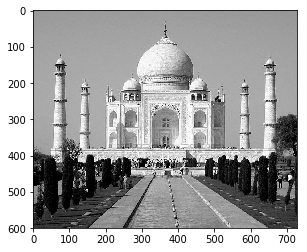

In [27]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('img/taj_mahal.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

Ultilizando um kernel de detecção de bordas:

In [28]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


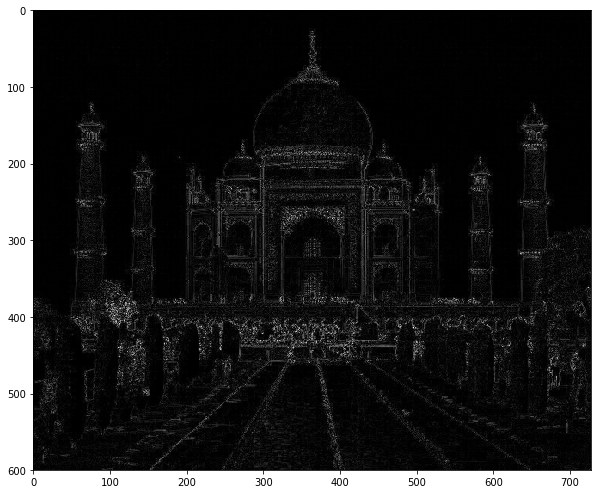

In [29]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

Podemos excluir valores maiores que 255 e torná-los inteiros.

In [34]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255

GRADIENT MAGNITUDE - Feature map


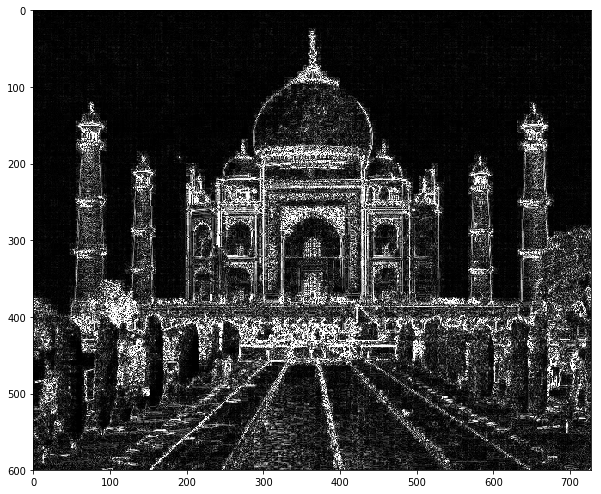

In [35]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

**Obs.: Para melhores resultados em CNNs, também é feito o processo de normalização, convertendo pixels para valores entre 0 e 1.**

Para um dígito do MNIST:

In [36]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document img/num3.jpg 


 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x7F0F48BE80B8> 


After conversion to numerical representation: 

 array([[26, 14, 12, ..., 11, 11, 11],
       [ 0,  0,  1, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       ...,
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=uint8)

 Input image converted to gray scale: 



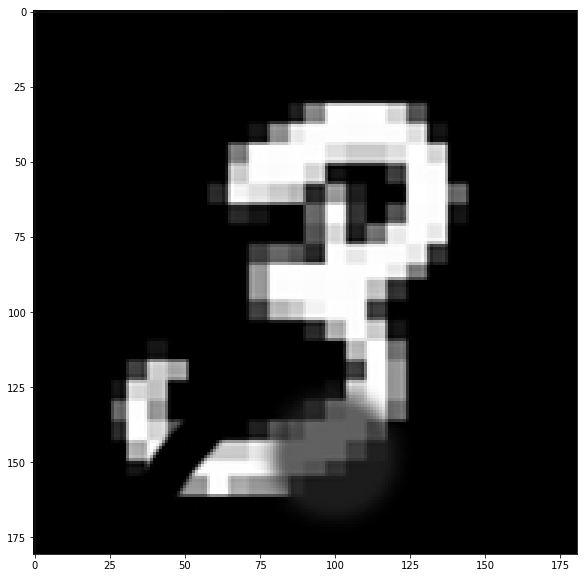

In [37]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('img/num3.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image
fig, aux = plt.subplots(figsize=(10, 10))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

Usando o mesmo kernel para detectar bordas:

GRADIENT MAGNITUDE - Feature map


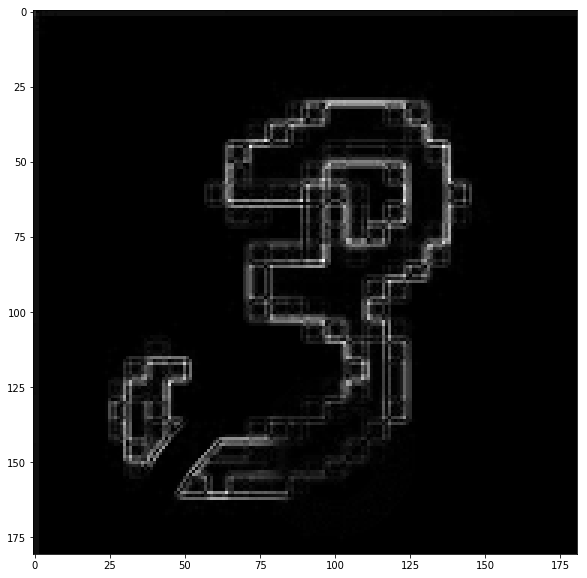

In [39]:
kernel = np.array([ [ 0, 1, 0],
                    [ 1,-4, 1],
                    [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

***

## Redes convolucionais com Tensorflow
1. [Dataset](#Dataset-MNIST)
2. [Multi-layer perceptron](#Multi-layer-perceptron)
3. [CNN](#CNN-no-MNIST)

In [1]:
import tensorflow as tf
tf.__version__

'1.10.0'

### Dataset MNIST
Dataset de números escritos à mão composto de 60 000 imagens de treino e outras 10 000 de teste. Inicialmente, vamos utilizar uma rede de neurônios simples. Em uma segunda etapa, criaremos uma CNN.

In [25]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Podemos usar duas formas de rodar uma sessão no Tensorflow:
- A primeira, já usada, que consiste em definir todos os parâmetros e grafos e só então rodar a sessão
- A sessão interativa é mais comum em ambientes como jupyter notebooks e aceita modificações no modelo ao longo do tempo

In [38]:
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))

Criamos placeholders. Para ```X``` (input) são 784 pixels (28x28). Para ```Y``` (output) são 10 possíveis classes. A primeira dimensão indica o tamanho da leva de dados fornecidos. No caso, a leva pode ser de qualquer tamanho (```none```).

In [39]:
x  = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

### Multi-layer perceptron
Para inicializar a rede, definimos os pesos e viés com zeros.

In [40]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))
# run the op initialize_all_variables using an interactive session
sess.run(tf.global_variables_initializer())

Em seguida, vamos aplicar os pesos e o viés aos neurônios

In [41]:
# mathematical operation to add weights and biases to the inputs
tf.matmul(x,W) + b

<tf.Tensor 'add_4:0' shape=(?, 10) dtype=float32>

Para fazer a classificação, devemos aplicar a função de ativação Softmax, capaz de receber probabilidades e retornar a classe predita.

In [42]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

Para conseguirmos reduzir o erro entre o que é obtido e o que realmente o dataset de treino nos diz, usamos a função de [entropia cruzada](https://en.wikipedia.org/wiki/Cross_entropy).

In [43]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

Para minimizar a função 'loss' ou de erro, usamos o otimizador gradiente descendente.

In [44]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

No treinamento serão utilizados mini levas de imagens, para otimizar o processo de treinamento. 

In [45]:
#Load 50 training examples for each training iteration   
for i in range(20000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

#### Teste

In [46]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}) * 100
print("The final accuracy for the simple ANN model is: {} % ".format(acc) )

The final accuracy for the simple ANN model is: 91.28000140190125 % 


In [70]:
sess.close() #finish the session

***

## CNN no MNIST
A arquitetura usada a seguir será a seguinte:
- (Input) -> [batch_size, 28, 28, 1]  >> Apply 32 filter of [5x5]
- (Convolutional layer 1)  -> [batch_size, 28, 28, 32]
- (ReLU 1)  -> [?, 28, 28, 32]
- (Max pooling 1) -> [?, 14, 14, 32]
- (Convolutional layer 2)  -> [?, 14, 14, 64] 
- (ReLU 2)  -> [?, 14, 14, 64] 
- (Max pooling 2)  -> [?, 7, 7, 64] 
- [fully connected layer 3] -> [1x1024]
- [ReLU 3]  -> [1x1024]
- [Drop out]  -> [1x1024]
- [fully connected layer 4] -> [1x10]

In [4]:
import tensorflow as tf
# finish possible remaining session
sess.close()

#Start interactive session
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))

Inicializo os parâmetros de entrada e saída:

In [5]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

Converto as imagens para funcionarem com tensores. O primeiro parâmetro é tamanho do batch, o segundo a largura, o terceiro a altura e o último o número de canais da imagem. No caso, [-1 (sem tamanho de batch definido), 28 (largura), 28 (altura), 1 (preto e branco)].

In [6]:
x_image = tf.reshape(x, [-1,28,28,1])  
x_image

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

#### Primeira camada de convolução
Criamos um tensor de kernels com a seguinte estrutura: [filter_height, filter_width, in_channels, out_channels]. No caso, definimos kernels de 5x5; input de 1 canal; e profundidade de 32 kernels diferentes aplicados à convolução.

In [7]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [8]:
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1
convolve1

<tf.Tensor 'add:0' shape=(?, 28, 28, 32) dtype=float32>

Aplico a função de ativação ReLu para subtituir valores negativos por zeros:

In [9]:
h_conv1 = tf.nn.relu(convolve1)

Aplico então o max pooling, responsável por diminuir a dimensionalidade do problema ao selecionar o maior pixel de um grupo definido de pixels (grupo 2x2). Também defino o stride do pooling (2 na horizontal e 2 na vertical), para não haver redundância de pixels analisados.

In [10]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

#### Segunda camada de convolução
Aplicaremos as mesmas operações da primeira camada, no entanto, a imagem original passou or um redução de dimensionalidade (14x14), como podemos ver no output da última célula do notebook. Nessa camada, usaremos uma maior profundidade de kernels de convolução.

In [11]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2
h_conv2 = tf.nn.relu(convolve2)
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

#### Camada fully connected
A camada fully connected obtém as imagens filtradas pelas camadas anteriores e as converte em uma array. Assim, cada uma das 64 camadas de [7x7] obtidas na segunda camada são dispostas em arrays de [49x1]. As 64 arrays [49x1] formam então uma nova array [3136x1]. Essa saída é conectada a uma outra camada de tamanho [1024x1], formando uma saída [3163x1024], sendo esse o peso das duas camadas.

O primeiro passo é converter em uma array 1D:

In [12]:
layer2_matrix = tf.reshape(conv2, [-1, 7 * 7 * 64])

Aleatoriamente são definidos os pesos dessa camada de profundidade 1024, assim como os viés, definido como constante de 0,1

In [13]:
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

Aplico pesos e o viés à camada

In [14]:
fcl = tf.matmul(layer2_matrix, W_fc1) + b_fc1

Função de ativação ReLu

In [15]:
h_fc1 = tf.nn.relu(fcl)
h_fc1

<tf.Tensor 'Relu_2:0' shape=(?, 1024) dtype=float32>

#### Camada Dropout
A camada dropout aumenta a robustez da rede e diminui as chances de overfitting ao "desligar" algumas unidades ao não atualizar os seus pesos durante uma leva de dados.

In [16]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

<tf.Tensor 'dropout/mul:0' shape=(?, 1024) dtype=float32>

#### Camada de saída
A última camada constitui de 1024 inputs (cada camada de 3136 pixels) e 10 outputs (um para cada classe de algarismo).

Primeiro, definimos seu peso (aletatoriamente), seu viés e o aplicamos à camada.

In [17]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]
fc = tf.matmul(layer_drop, W_fc2) + b_fc2

Finalmente, adicionamos a função de ativação Softmax, que nos entrega a probabilidade do output ser de cada uma das 10 classes observadas.

In [18]:
y_CNN = tf.nn.softmax(fc)
y_CNN

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

### Definição de funções e treinamento
Para testar o resultado das nossas predições, vamos usar a entropia cruzada para verificá-la.

In [19]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))

O otimizador utilizado será o [Adam](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer), semelhante ao gradiente descendente.

In [20]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

Para definir quantas predições foram acertadas nós contamos uma a uma pelo seguinte método.

In [21]:
correct_prediction = tf.equal(tf.argmax(y_CNN, 1), tf.argmax(y_, 1))

A acurácia será definida pela média de casos corretos.

In [22]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
sess.run(tf.global_variables_initializer())

In [26]:
for i in range(20001):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.1
step 100, training accuracy 0.88
step 200, training accuracy 0.94
step 300, training accuracy 0.92
step 400, training accuracy 0.88
step 500, training accuracy 0.98
step 600, training accuracy 0.96
step 700, training accuracy 0.98
step 800, training accuracy 1
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
step 1100, training accuracy 0.94
step 1200, training accuracy 1
step 1300, training accuracy 0.96
step 1400, training accuracy 0.96
step 1500, training accuracy 0.98
step 1600, training accuracy 0.9
step 1700, training accuracy 0.96
step 1800, training accuracy 0.98
step 1900, training accuracy 1
step 2000, training accuracy 1
step 2100, training accuracy 0.96
step 2200, training accuracy 1
step 2300, training accuracy 1
step 2400, training accuracy 0.98
step 2500, training accuracy 0.96
step 2600, training accuracy 0.96
step 2700, training accuracy 0.98
step 2800, training accuracy 1
step 2900, training accuracy 0.98
step 3000, trai

### Evaluação do modelo

In [28]:
# evaluate in batches to avoid out-of-memory issues
n_batches = mnist.test.images.shape[0] // 50
cumulative_accuracy = 0.0
for index in range(n_batches):
    batch = mnist.test.next_batch(50)
    cumulative_accuracy += accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
print("test accuracy {}".format(cumulative_accuracy / n_batches))

test accuracy 0.9909000039100647


### Visualização das camadas
Podemos visualizar os filtros da primeira camada da seguinte maneira:

In [29]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1]))

--2018-12-24 16:44:56--  http://deeplearning.net/tutorial/code/utils.py
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5,0K) [text/plain]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4,98K  --.-KB/s    in 0,008s  

2018-12-24 16:44:59 (598 KB/s) - ‘utils1.py’ saved [5097/5097]



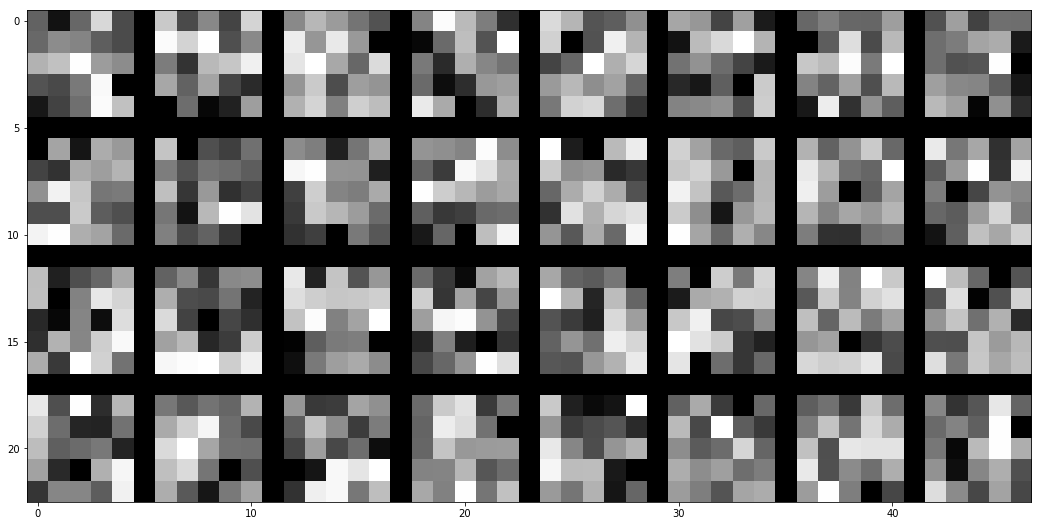

In [30]:
!wget --output-document utils1.py http://deeplearning.net/tutorial/code/utils.py
import utils1
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

Podemos ver aqui a saída da primeira camada de convolução:

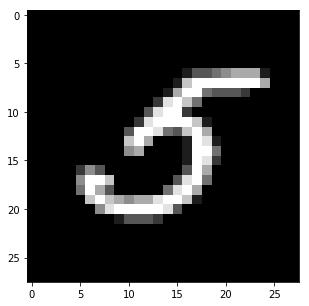

In [34]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

Vemos a seguir a saída de cada um dos 32 filtros. 

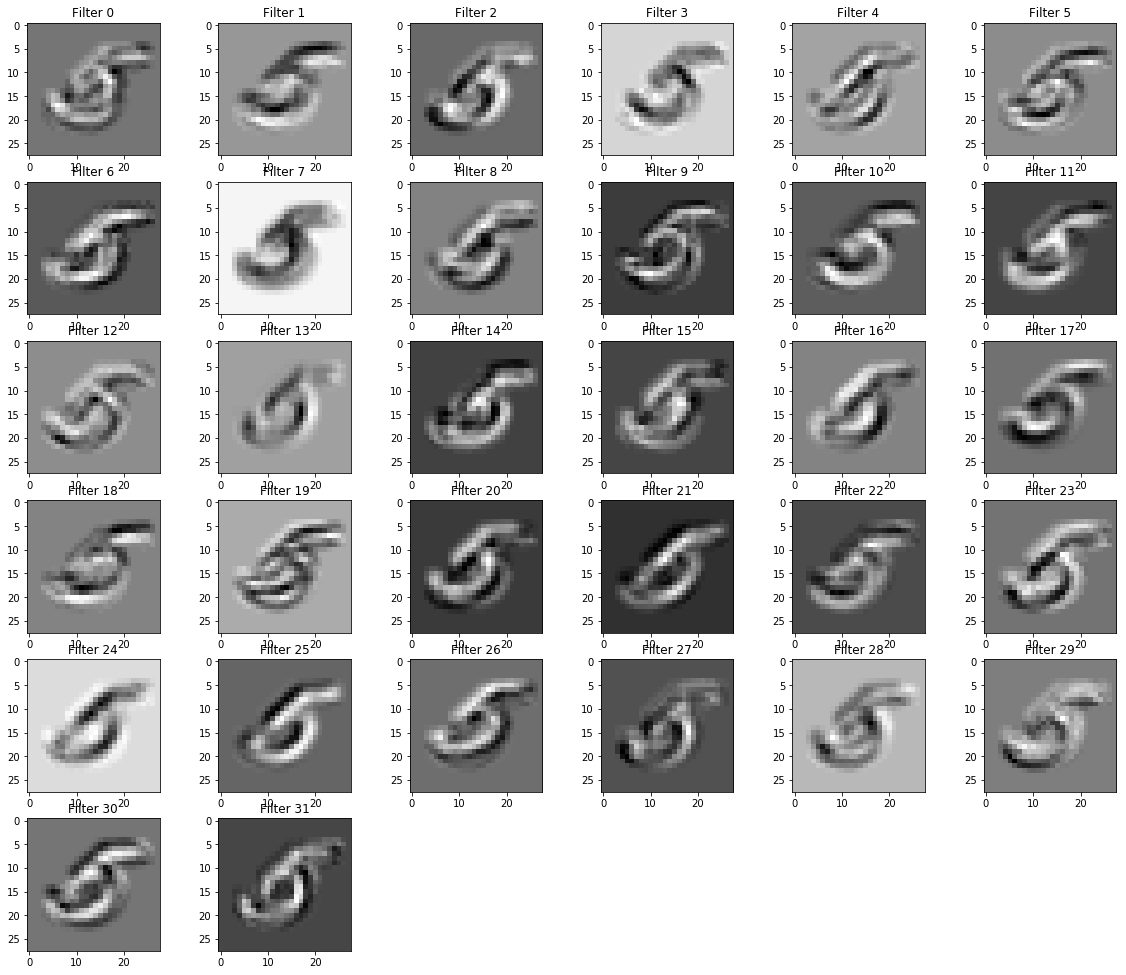

In [35]:
ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

Podemos ver aqui a saída da segunda camada de convolução:

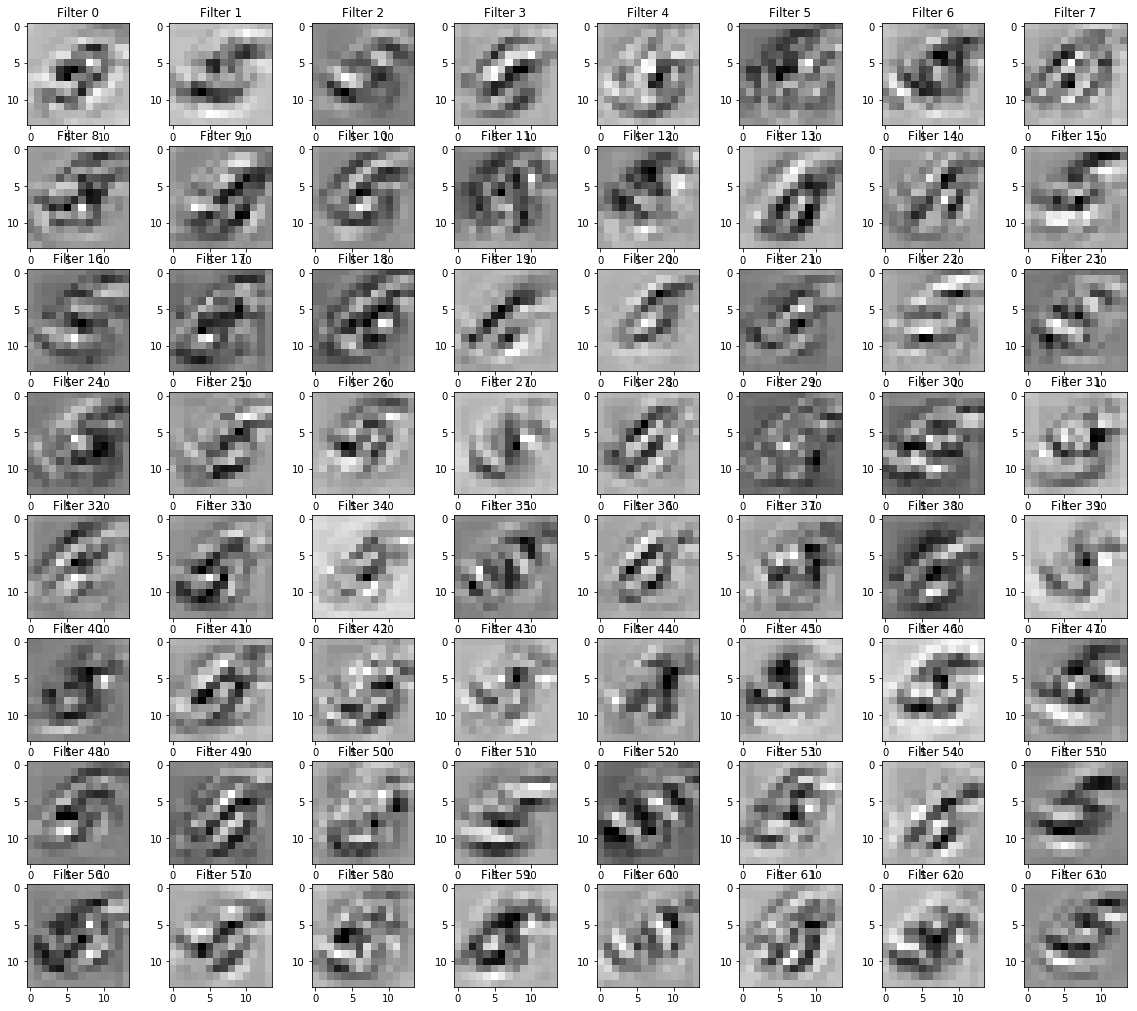

In [36]:
ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [37]:
sess.close() #finish the session

### Visualização da convolução interativa
Podemos visualizar como funcionam as CNNs nesse [site](http://scs.ryerson.ca/~aharley/vis/conv/).